In [2]:
import pyproj
import pandas as pd
data = pd.read_csv('../ICESAT/tasmania/tasman_samples.csv', delimiter=' ')

def transform_datafr(from_epsg, to_epsg, df):
    src_crs = pyproj.CRS.from_epsg(from_epsg)  # WGS84
    target_crs = pyproj.CRS.from_epsg(to_epsg)  # Web Mercator
    # Create a transformer
    transformer = pyproj.Transformer.from_crs(src_crs, target_crs, always_xy=True)
    df['x'], df['y'] = transformer.transform(df['x'].values, df['y'].values)
    return df

dataT = transform_datafr(5551, 4326, data)

dataT.columns = ['lon', 'lat', 'h_te_interp']
dataT = dataT[['lat', 'lon', 'h_te_interp']]

# dataT.to_csv('../ICESAT/tasmania/tasman_samples4.csv', index=False)


Freq: 200140 147895
Min: -104.58004
Max: 1244.2256
Std: 241.05431210370278


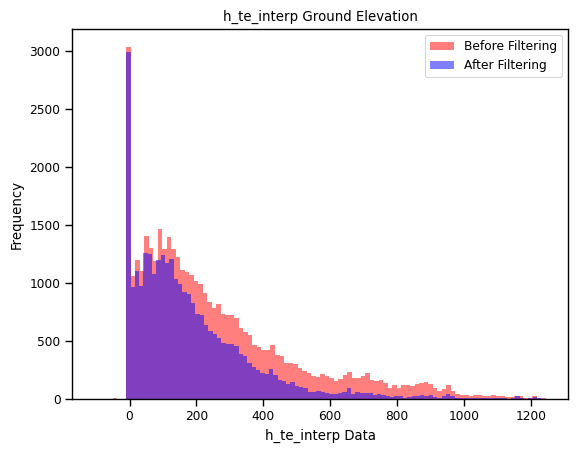

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_context("paper")

data_tas = pd.read_csv('../ICESAT/tasmania/tasmania.csv', delimiter=',')
tasmania = data_tas[data_tas["h_te_uncertainty"] < 25].reset_index(drop=True)

print("Freq:", data_tas.size, tasmania.size)
print("Min:", data_tas['h_te_interp'].min())
print("Max:", data_tas['h_te_interp'].max())
print("Std:", data_tas['h_te_interp'].std())

data1 = data_tas['h_te_interp']
data2 = tasmania['h_te_interp']

plt.hist(data1, bins=100, alpha=0.5, label='Before Filtering', color='red')
plt.hist(data2, bins=100, alpha=0.5, label='After Filtering', color='blue')
plt.xlabel('h_te_interp Ground Elevation')
plt.ylabel('Frequency')
plt.title('Histogram of h_te_interp Ground Elevation')
plt.legend()
plt.show()


